<a href="https://colab.research.google.com/github/Tiklu01/carPricePredictionLinearRegression/blob/main/carPricePredictionMaunal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

In [118]:
# Function to process a single CSV file and return X and Y
def process_csv(file_path):
    df = pd.read_csv(file_path)
    current_year = pd.Timestamp.now().year
    df['age'] = current_year - df['year']
    df_processed = df[['age', 'mileage', 'price']]
    df_processed = df_processed[df_processed['age'] >= 0]
    df_processed = df_processed[df_processed['mileage'] >= 0]
    df_processed = df_processed[df_processed['price'] >= 0]
    processed_file_path = os.path.splitext(file_path)[0] + '_processed.csv'
    df_processed.to_csv(processed_file_path, index=False)
    X = df_processed[['age', 'mileage']]
    Y = df_processed['price']
    return X, Y

file_paths = [
    'sample_data/audi.csv',
    'sample_data/bmw.csv',
    'sample_data/ford.csv',
    'sample_data/merc.csv',
    'sample_data/toyota.csv'
]

all_X = []
all_Y = []

for file_path in file_paths:
    X, Y = process_csv(file_path)
    all_X.append(X)
    all_Y.append(Y)

final_X = pd.concat(all_X, ignore_index=True)
final_Y = pd.concat(all_Y, ignore_index=True)

# Combine features and target into a single DataFrame for filtering
combined_df = pd.concat([final_X, final_Y], axis=1)

# Filter out negative values
combined_df = combined_df[(combined_df['age'] >= 0) & (combined_df['mileage'] >= 0) & (combined_df['price'] >= 0)]

# Split back into features and target
final_X = combined_df[['age', 'mileage']]
final_Y = combined_df['price']

filtered_data = (final_X['age'] >= 0) & (final_X['mileage'] >= 0) & (final_Y >= 0)
final_X = final_X[filtered_data]
final_Y = final_Y[filtered_data]


In [119]:
#z-score normalization
# Normalize the features
mu = np.mean(final_X, axis=0)
sigma = np.std(final_X, axis=0)
X_norm= (final_X - mu) / sigma
y = final_Y
print(X_norm)

            age   mileage
0      0.012934 -0.364138
1      0.470617  0.578223
2      0.470617  0.290147
3      0.012934  0.106260
4     -0.902431 -0.996599
...         ...       ...
59265  2.759030  0.292633
59266  2.759030  0.575967
59267  2.301347  1.029284
59268  2.759030  1.706083
59269  2.759030  0.989137

[59270 rows x 2 columns]


In [120]:
w = np.zeros(X.shape[1])
b = 0


In [121]:
# Set hyperparameters
alpha = 0.01  # Learning rate
num_iterations = 1000  # Number of iterations



In [122]:
def compute_cost(X_norm, y, w, b):
    m = len(y)
    f_wb = np.dot(X_norm, w) + b
    cost = (1/m) * np.sum((f_wb - y)**2)
    return cost

In [123]:
def compute_gradient(X_norm, y, w, b):
  m = len(y)
  f_wb = np.dot(X_norm, w) + b
  dj_dw = (1/m) * np.dot(X_norm.T, (f_wb - y))
  dj_db = (1/m) * np.sum(f_wb - y)
  return dj_dw, dj_db

In [124]:
def gradient_descent(X_norm, y, w, b, alpha, num_iterations):
  j_history = []
  for i in range(num_iterations):
    dj_dw, dj_db = compute_gradient(X_norm, y, w, b)
    w = w - alpha * dj_dw
    b = b - alpha * dj_db
    cost = compute_cost(X_norm, y, w, b)
    j_history.append(cost)
  return w, b, j_history

In [125]:
# Train the model using gradient descent
w, b, cost_history = gradient_descent(X_norm, y, w, b, alpha, num_iterations)


In [126]:
# Print the final weights, bias, and cost history
print("Weights:", w)
print("Bias:", b)
print("Cost history:", cost_history[-10:])  # Print the last 10 cost values to see convergence


Weights: [-4377.58687124 -1639.14897392]
Bias: 18867.867885493088
Cost history: [89022037.22475636, 89022000.84213467, 89021964.6449929, 89021928.63238198, 89021892.80335781, 89021857.15698119, 89021821.6923177, 89021786.40843786, 89021751.30441697, 89021716.37933512]


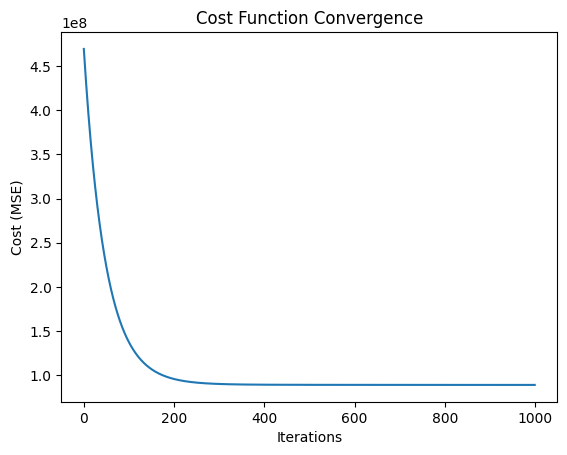

In [127]:
# Plot the cost function convergence
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Convergence')
plt.show()



In [128]:
# Scatter plot with regression line
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

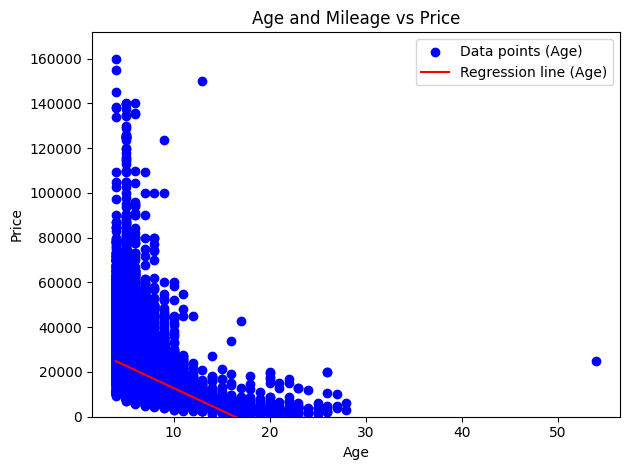

In [129]:
# Scatter plot for Age vs Price with regression line
plt.scatter(final_X['age'], final_Y, color='blue', label='Data points (Age)')
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Age and Mileage vs Price')

# Predict price based on age
age_range = np.linspace(final_X['age'].min(), final_X['age'].max(), 100)
age_norm_range = (age_range - mu[0]) / sigma[0]  # Normalize age
price_predicted_age = np.dot(np.c_[age_norm_range, np.zeros_like(age_norm_range)], w) + b
plt.plot(age_range, price_predicted_age, color='red', label='Regression line (Age)')

# Set the y-axis to start from zero
plt.ylim(0, plt.ylim()[1])


# Adding legend
plt.legend()

plt.tight_layout()
plt.show()


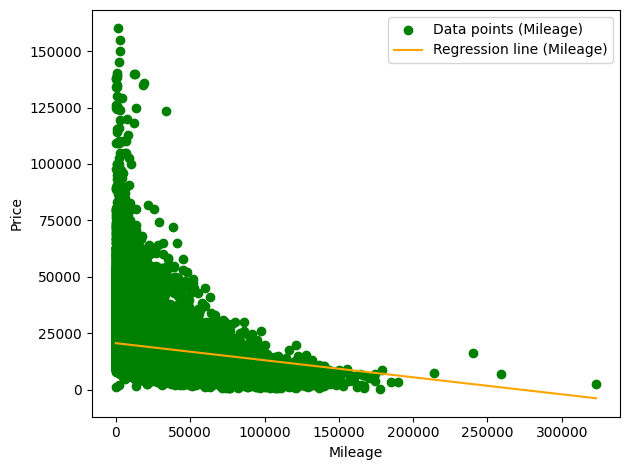

In [130]:
# Scatter plot for Mileage vs Price with regression line
plt.scatter(final_X['mileage'], final_Y, color='green', label='Data points (Mileage)')
plt.xlabel('Mileage')
plt.ylabel('Price')

# Predict price based on mileage
mileage_range = np.linspace(final_X['mileage'].min(), final_X['mileage'].max(), 100)
mileage_norm_range = (mileage_range - mu[1]) / sigma[1]  # Normalize mileage
price_predicted_mileage = np.dot(np.c_[np.zeros_like(mileage_norm_range), mileage_norm_range], w) + b
plt.plot(mileage_range, price_predicted_mileage, color='orange', label='Regression line (Mileage)')

# Adding legend
plt.legend()

plt.tight_layout()
plt.show()



In [131]:
# Example values for prediction
example_age = 3
example_mileage = 30000

# Normalize the example values
example_age_norm = (example_age - mu[0]) / sigma[0]
example_mileage_norm = (example_mileage - mu[1]) / sigma[1]

# Predict the price using the regression model
predicted_price = np.dot([example_age_norm, example_mileage_norm], w) + b

print(f"Predicted price for age {example_age} and mileage {example_mileage} is: ${predicted_price:.2f}")


Predicted price for age 3 and mileage 30000 is: $26345.76
